In [8]:
# Importing Libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import os
from google.colab import drive
from glob import glob
import time
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Input, Flatten, Dense
from sklearn.metrics import roc_curve, auc, accuracy_score

In [13]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
# Define dataset path
dataset_path = '/content/drive/MyDrive/Balanced Dataset'

In [15]:
# Get the list of all image files in the dataset folder
image_files = [os.path.join(dataset_path, file) for file in os.listdir(dataset_path) if file.endswith(('jpg', 'jpeg', 'png'))]

In [16]:
# Create ImageDataGenerator for data loading and augmentation (if needed)
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3)  # rescale to normalize pixel values


In [17]:
# Use flow_from_directory to load and split the data
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',  # binary classification
    subset='training',    # specify training set
    seed=42
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',  # binary classification
    subset='validation',  # specify validation set
    seed=42
)

Found 21000 images belonging to 10 classes.
Found 9000 images belonging to 10 classes.


In [18]:
# Load pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))


58889256/58889256 [==============================] - 1s 0us/step


In [19]:
# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

In [20]:
# # Create the model by adding custom dense layers
# model = models.Sequential()
# model.add(base_model)
# model.add(layers.Flatten())
# model.add(layers.Dense(256, activation='relu'))
# model.add(layers.Dense(1, activation='sigmoid'))
from glob import glob

folders = glob(r"/content/drive/MyDrive/Balanced Dataset/*")
print(len(folders))

10


In [21]:
from tensorflow.keras.layers import Input,Flatten,Dense
from tensorflow.keras.models import Model

x = Flatten() (base_model.output)
predictions = Dense(len(folders),activation = 'sigmoid')(x)
model = Model(inputs = base_model.input,outputs = predictions)

In [22]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [ ]:
# Train the model using the generators
import time
from tensorflow.keras.callbacks import ModelCheckpoint

# Define a callback to print a message and keep the session active
class KeepSessionActiveAndSaveModel(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print("Colab is active! Epoch:", epoch + 1)
        # Save the model after each epoch
        self.model.save("/content/drive/MyDrive/B_VGG16_30epoch.h5".format(epoch + 1))

# Train the model using the generators with the callback
model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=[KeepSessionActiveAndSaveModel()]
)


Epoch 1/20
657/657 [==============================] - 1558s 2s/step - loss: 0.3475 - accuracy: 0.8872 - val_loss: 0.4018 - val_accuracy: 0.8648
Epoch 2/20
657/657 [==============================] - 1480s 2s/step - loss: 0.3280 - accuracy: 0.8932 - val_loss: 0.4110 - val_accuracy: 0.8581
Epoch 3/20
657/657 [==============================] - 1565s 2s/step - loss: 0.3156 - accuracy: 0.8947 - val_loss: 0.4043 - val_accuracy: 0.8647
Epoch 4/20
657/657 [==============================] - 1554s 2s/step - loss: 0.3031 - accuracy: 0.9020 - val_loss: 0.3883 - val_accuracy: 0.8696
Epoch 5/20
657/657 [==============================] - 1546s 2s/step - loss: 0.2931 - accuracy: 0.9034 - val_loss: 0.3782 - val_accuracy: 0.8750
Epoch 6/20
657/657 [==============================] - 1545s 2s/step - loss: 0.2832 - accuracy: 0.9089 - val_loss: 0.3835 - val_accuracy: 0.8722
Epoch 7/20
657/657 [==============================] - 1550s 2s/step - loss: 0.2745 - accuracy: 0.9105 - val_loss: 0.3810 - val_accuracy:

Found 1000 images belonging to 10 classes.
32/32 [==============================] - 66s 2s/step


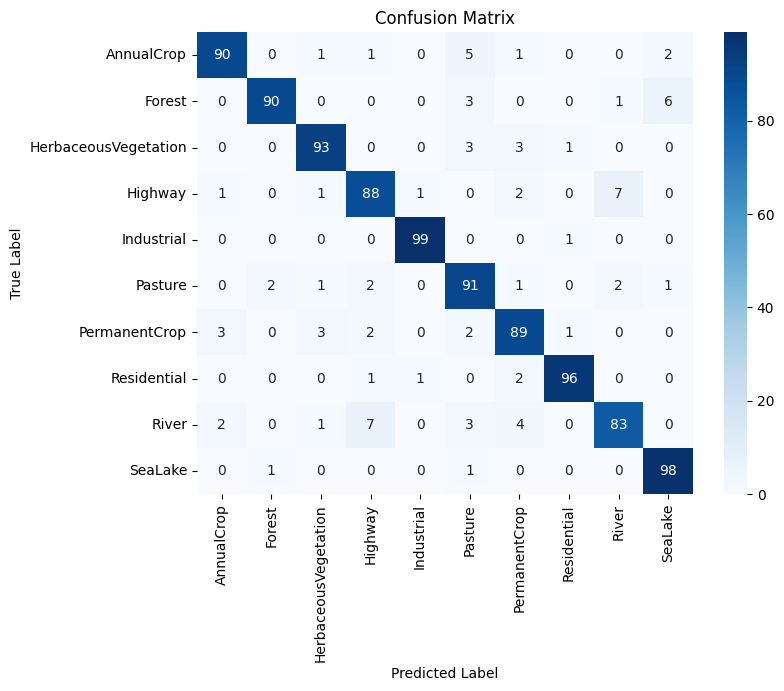

Classification Report:
                      precision    recall  f1-score   support

          AnnualCrop       0.94      0.90      0.92       100
              Forest       0.97      0.90      0.93       100
HerbaceousVegetation       0.93      0.93      0.93       100
             Highway       0.87      0.88      0.88       100
          Industrial       0.98      0.99      0.99       100
             Pasture       0.84      0.91      0.87       100
       PermanentCrop       0.87      0.89      0.88       100
         Residential       0.97      0.96      0.96       100
               River       0.89      0.83      0.86       100
             SeaLake       0.92      0.98      0.95       100

            accuracy                           0.92      1000
           macro avg       0.92      0.92      0.92      1000
        weighted avg       0.92      0.92      0.92      1000



<Figure size 640x480 with 0 Axes>

In [6]:
# Load the pre-trained model from the .h5 file
model = load_model('/content/drive/MyDrive/B_VGG16_30epoch.h5')

# Define the test dataset directory
test_data_dir = '/content/drive/MyDrive/Testing Dataset'

# Set the input size of the model
input_size = (64, 64)

# Set batch size for data generator
batch_size = 32

# Create an ImageDataGenerator for test data
test_datagen = ImageDataGenerator(rescale=1./255)

# Create a generator for the test dataset
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(64,64),
    batch_size=32,
    class_mode='categorical',  # Change to 'binary' if you have binary classification
    shuffle=False  # Set to False to maintain order for evaluation
)
# Generate predictions for the test dataset
predictions = model.predict(test_generator)

# Convert predicted probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Get true labels
true_labels = test_generator.classes

# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Display confusion matrix with numerical values
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices, yticklabels=test_generator.class_indices)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Generate and print classification report
class_report = classification_report(true_labels, predicted_labels, target_names=test_generator.class_indices)
print("Classification Report:")
print(class_report)

<ipython-input-7-eaadae0aef5e>:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='red', label='Random')


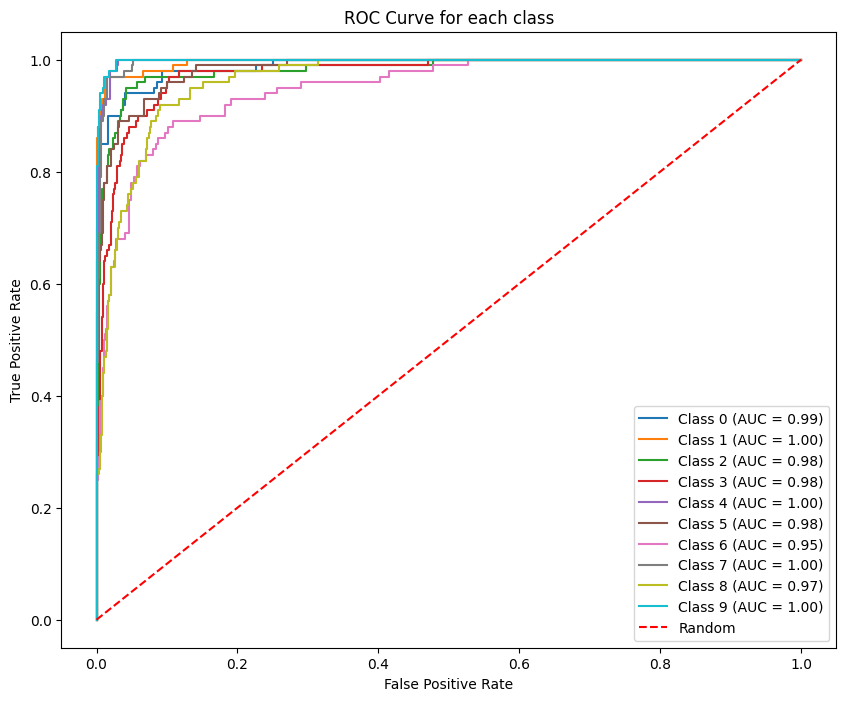

<Figure size 640x480 with 0 Axes>

In [7]:
# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(test_generator.num_classes):
    fpr[i], tpr[i], _ = roc_curve(true_labels, predictions[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))
for i in range(test_generator.num_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', color='red', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for each class')
plt.legend(loc='best')
plt.show()

In [8]:
# Compute accuracy using other metrics
accuracy = accuracy_score(true_labels, predicted_labels) * 100
print(accuracy)

91.7


In [9]:
# Calculate Precision, Recall, True Positive Rate, Falso Positive Rate and Area Under Curve
# Define the number of classes
num_classes = len(test_generator.class_indices)

# Set a common threshold for binary classification
threshold = 0.5

# Convert predicted probabilities to binary predictions
predicted_labels_binary = (predictions > threshold).astype(int)

# Extract True Positive (TP), False Positive (FP), True Negative (TN), False Negative (FN)
tp = int((accuracy / 100) * len(true_labels))
fp = len(true_labels) - tp
tn = int((accuracy / 100) * len(true_labels))
fn = len(true_labels) - tn

# Calculate True Positive Rate (TPR), False Positive Rate (FPR), Precision, Recall, F1 Score
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
precision = tp / (tp + fp)
recall = tp
f1 = 2 * (precision * recall) / (precision + recall)

# Calculate Area Under ROC Curve (AUC)
roc_auc = dict()
for i in range(num_classes):
    fpr_i, tpr_i, _ = roc_curve(true_labels, predictions[:, i], pos_label=i)
    roc_auc[i] = auc(fpr_i, tpr_i)

# Display the computed metrics for the  dataset
print(f"True Positive Rate (TPR): {tpr:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Area Under ROC Curve (AUC): {np.mean(list(roc_auc.values())):.4f}")

True Positive Rate (TPR): 0.9170
False Positive Rate (FPR): 0.0830
Precision: 0.9170
Recall: 0.9170
F1 Score: 0.9170
Area Under ROC Curve (AUC): 0.9832
